In [1]:
import qutip as qt
import numpy as np

# Tracking info of simulations 
import tqdm
import time
import warnings

#Saving data
import pandas as pd
import json
import os

import matplotlib.pyplot as plt
from IPython.display import Image
from matplotlib.gridspec import GridSpec

In [2]:
import model_building as md
import Hamiltonian as Ham
import dynamics as dyn
import data_handling as dh
import plots as plots


In [3]:
def initialize_system(state_dictionary, N):
    initial_state = md.crate_domain_wall_state(state_dictionary, register='Alice')
    final_state   = md.crate_domain_wall_state(state_dictionary, register='Bob')

    initial_chain = md.initialize_general_system(N, initial_state, register='Alice')
    final_chain   = md.initialize_general_system(N, final_state, register='Bob')

    register_size = len(initial_state.dims[0])
    
    return initial_chain, final_chain, register_size

def build_hamiltonians(N, lmd, J, reg_size):

    H_transport = Ham.Hamiltonian(system_size = N,
                        mode = "forward",
                        lambda_factor = lmd,
                        global_J = J
                        )
    H_reset     = Ham.Hamiltonian(system_size = N,
                        mode = "backward",
                        lambda_factor = lmd,
                        register_size = reg_size,
                        global_J = J
                        )
    
    return H_transport, H_reset


def calculate_logs(x_data, y_data):
    log_axis = [np.log(i) for i in x_data]
    log_error = [np.log(1-i) for i in y_data]
    return log_axis, log_error

In [ ]:
#Constant simulation parameters
N = 13
lmd = 0.02272
ti = 0
tf = 150
step_number = 5000

ratios = range(1,21) # will be used to calculate J accordingly
ratio = 20
J = lmd*ratio

# Generate initial and target statess
# state_dictionary = {"1":1}            #min of qubit -1
# state_dictionary = {"1":1, "0":1}       #min of qubit -1
# state_dictionary = {"11":1, "00":1}     # min of qubit -1
state_dictionary = {"111":1, "000":1} #min of qubit -3

initial_system, final_system, register_size = initialize_system(state_dictionary, N)


H_transport, H_reset = build_hamiltonians(N, lmd, J, register_size)
total_full_fidelity, magnetizations = dyn.TwoStepAlgorithm(initial_system, final_system, H_transport, H_reset, ti, tf, step_number, AutoSwitch=True)



In [37]:
print(np.argmax(total_full_fidelity), max(total_full_fidelity), np.log(1-max(total_full_fidelity)))
print(max(int(np.argmin(magnetizations[:step_number,-3])),10))

918 0.9733915165655974 -3.6265251879352434
499


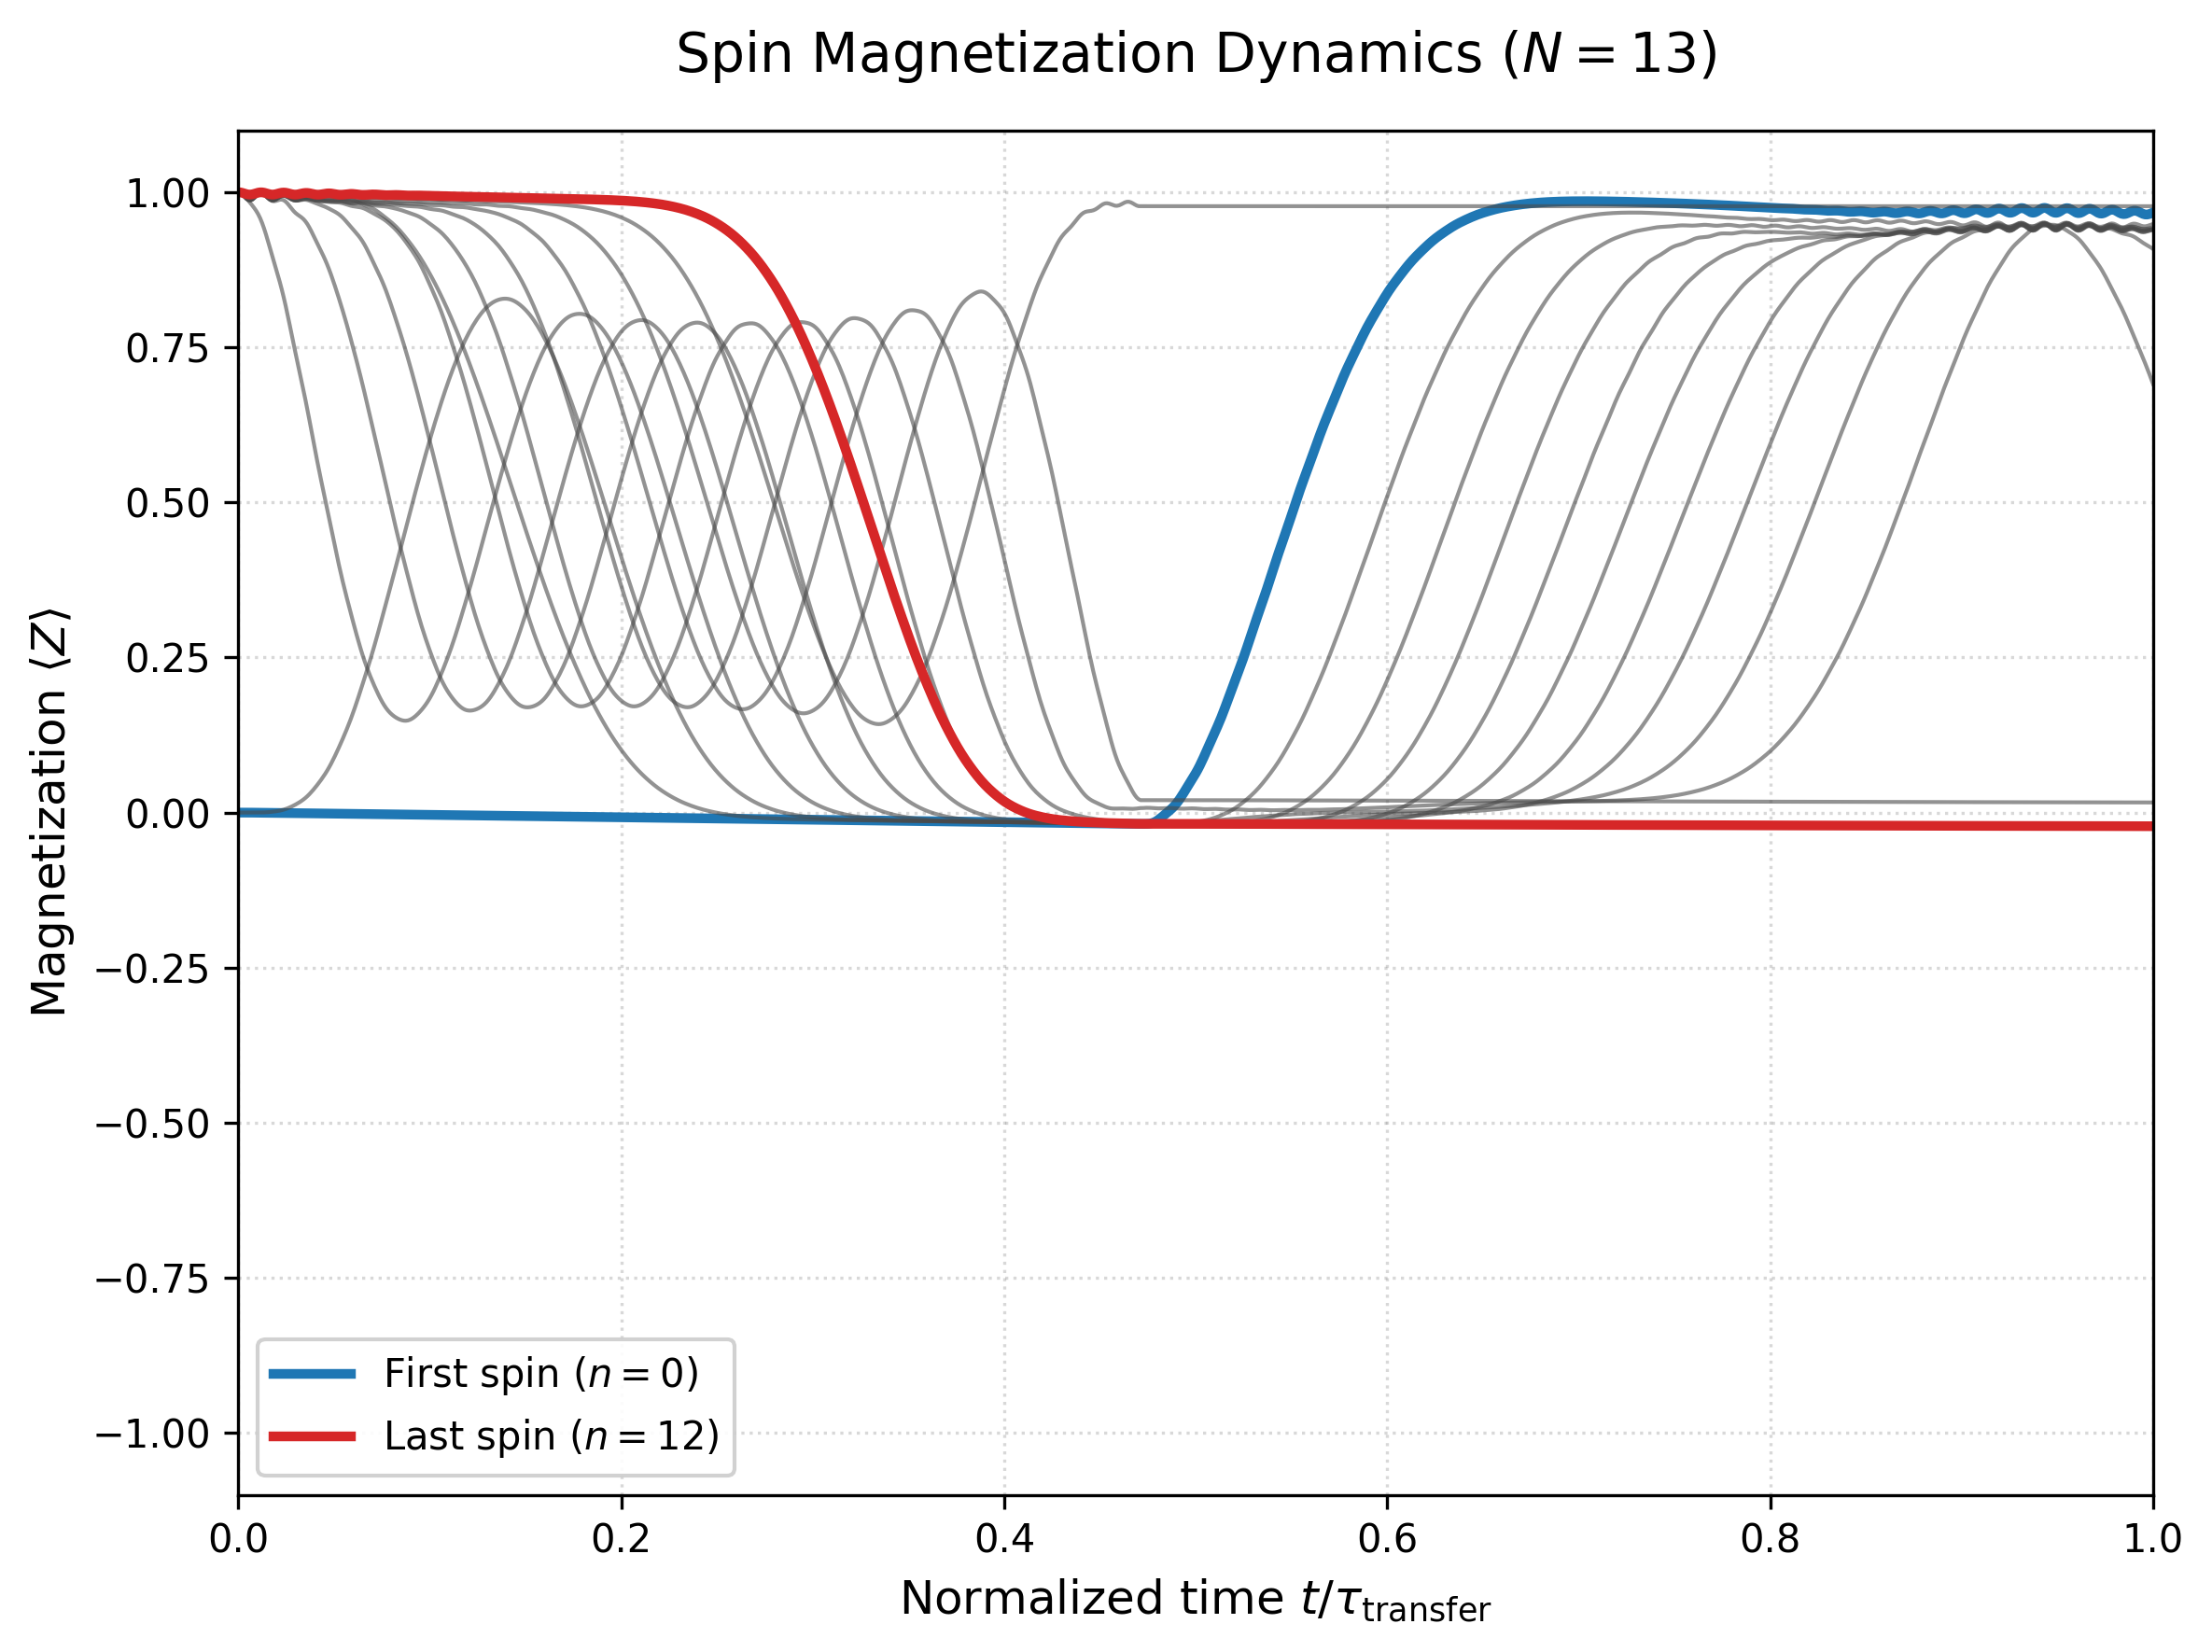

In [38]:
plots.plot_test_z_expectations(magnetizations, N)

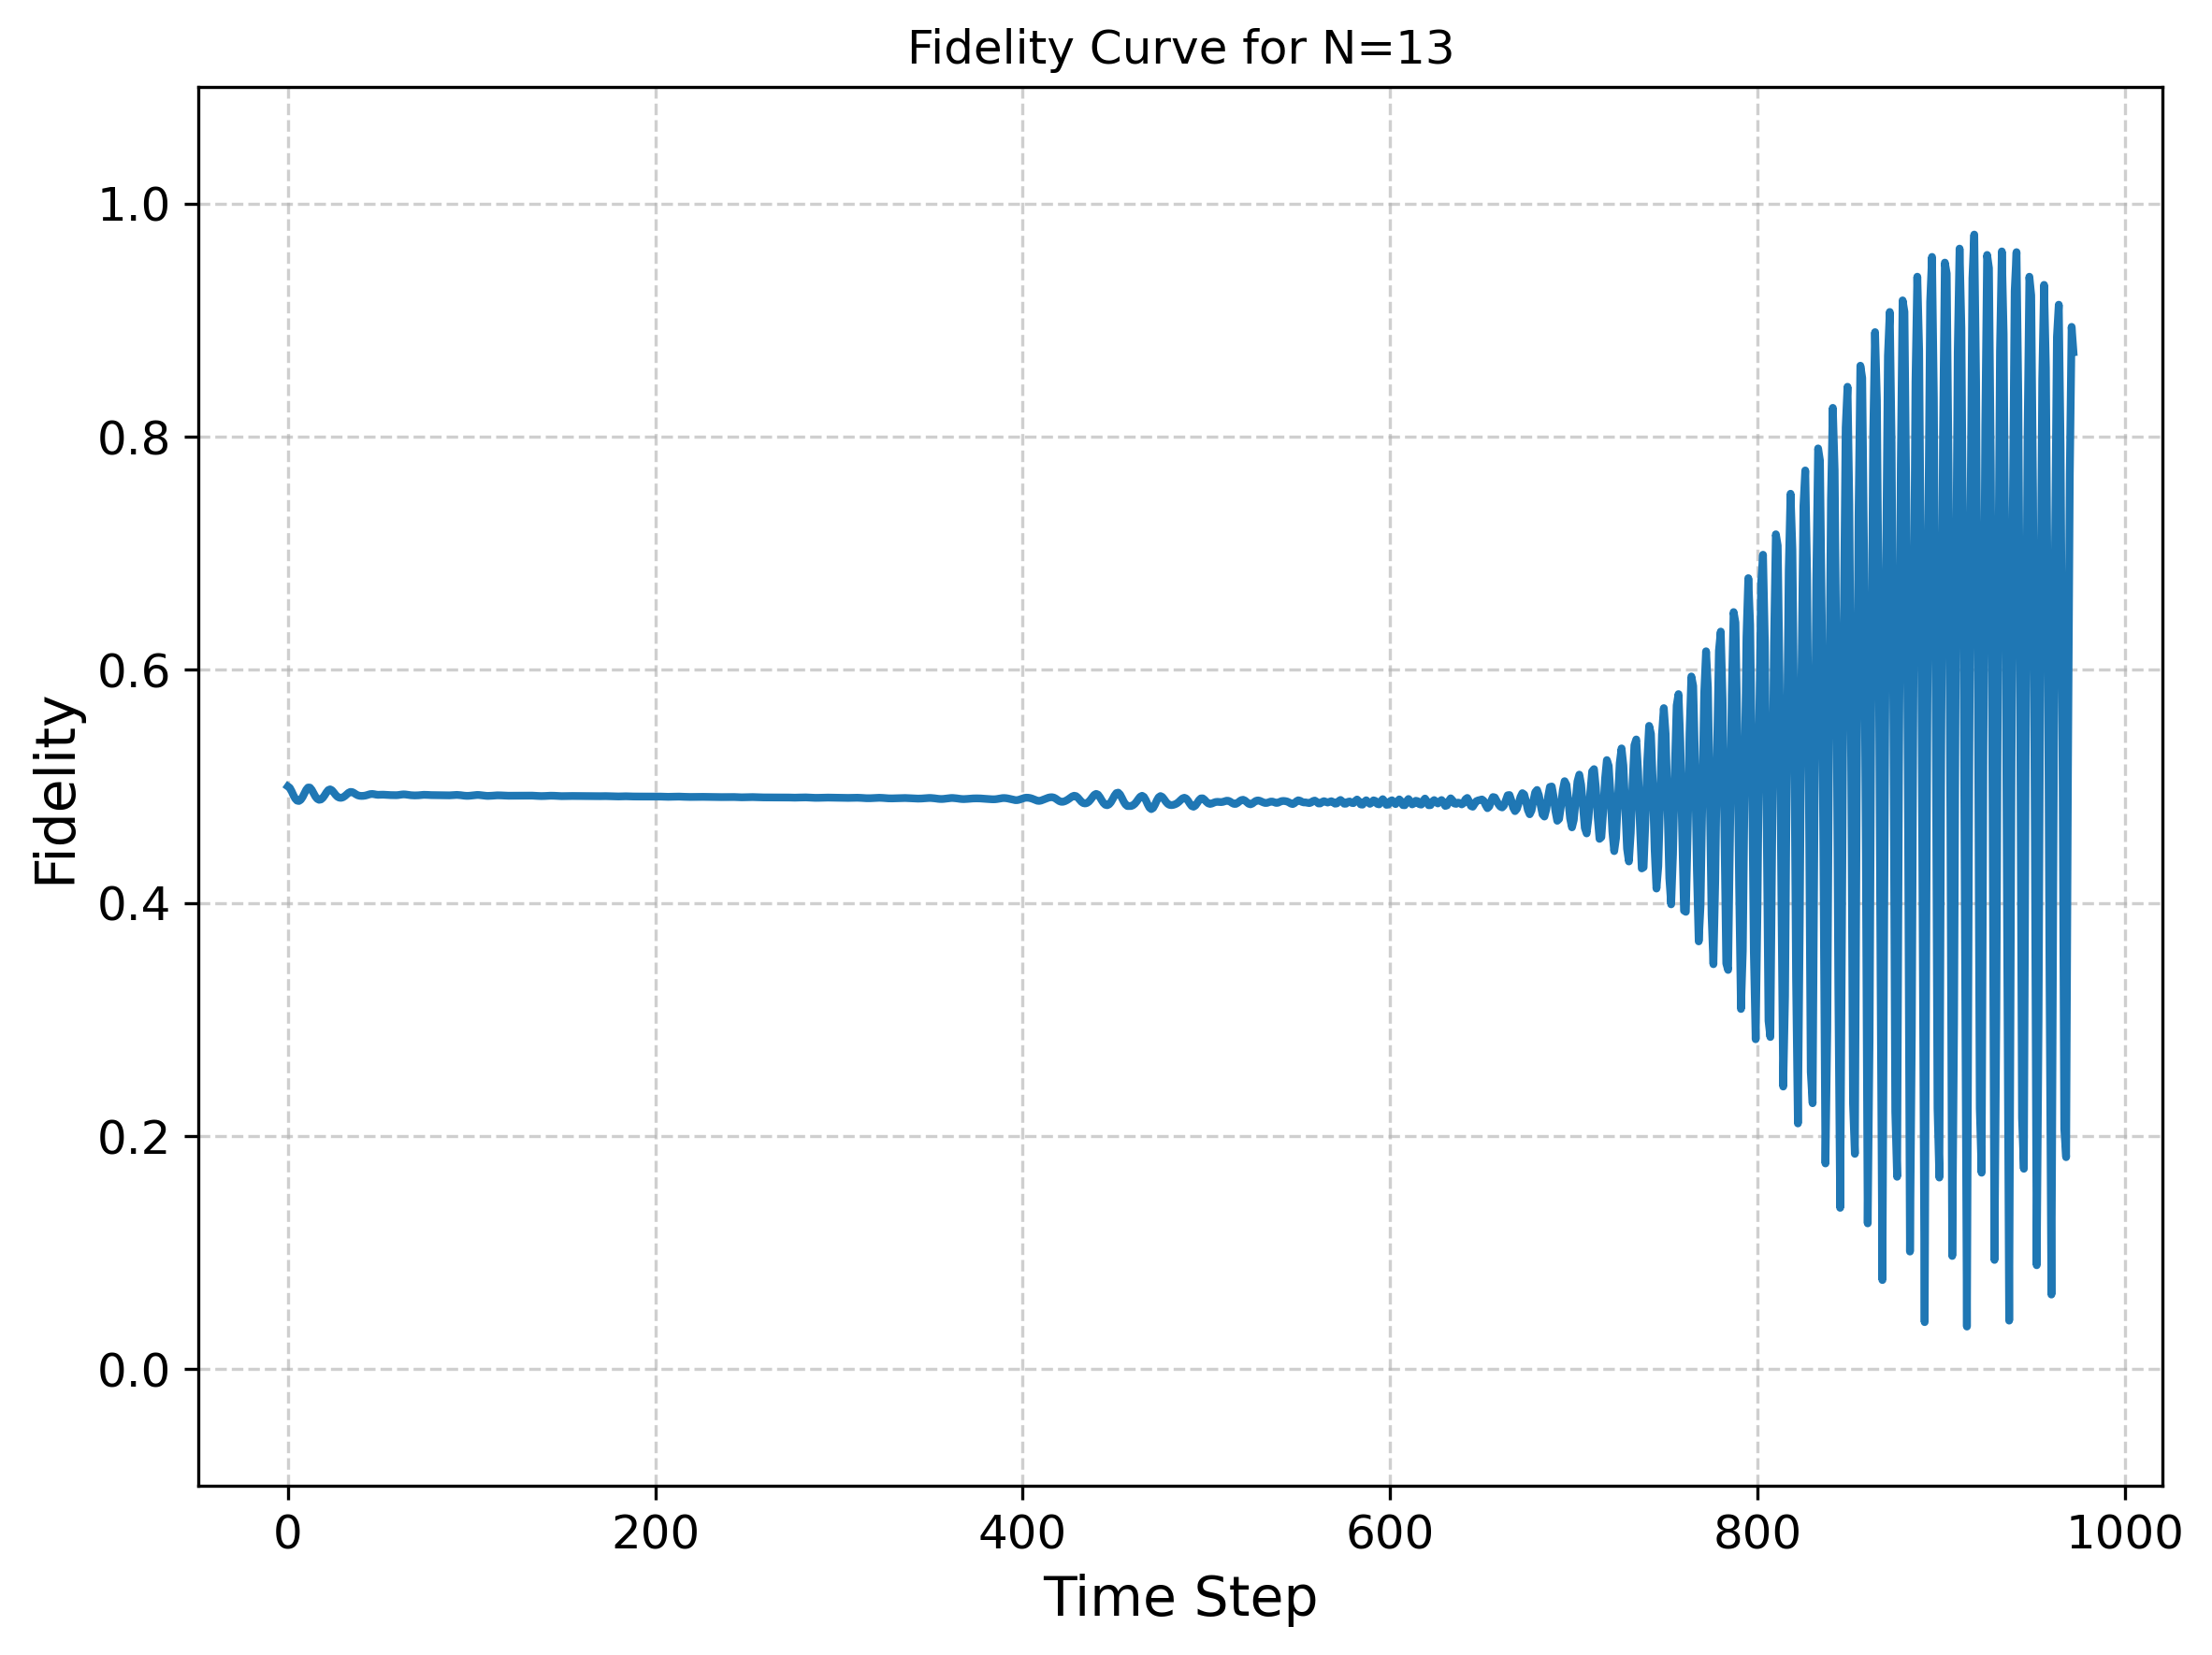

In [39]:
plots.plot_test_fidelity(total_full_fidelity, N)